In [1]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import modeling_functions

In [2]:
Xs =[]
ys = []
Xs_test = []
ys_test=[]

cmlabel = []


all_features= ['age', 'avg_glucose_level', 'bmi' ,
               'gender', 'hypertension','heart_disease', 
                   'ever_married', 'work_type', 'Residence_type', 'smoking_status']

medical_features=['age', 'avg_glucose_level', 'bmi', 
                  'gender', 'hypertension','heart_disease'
                  , 'smoking_status']



medical_features_onehot=[
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

c_bmi=['bmi']



root_path="../Resources/"



# LabelEncoder - Scaled Actual Data Load

In [3]:
# Loading  Actual data Scaled All Features

file_path = Path(root_path+"y_train_actual_balanced_scaled_train_dataset.csv")
y_train_scaled = pd.read_csv(file_path)
ys.append(y_train_scaled.values.ravel())

file_path = Path(root_path+"X_train_actual_balanced_scaled_train_dataset.csv")
X_train_scaled = pd.read_csv(file_path)
Xs.append(X_train_scaled)

cmlabel.append("All Features - Using Actual Scaled data")


file_path = Path(root_path+"y_test_actual_balanced_scaled_train_dataset.csv")
y_test_scaled = pd.read_csv(file_path)
ys_test.append(y_test_scaled.values.ravel())

file_path = Path(root_path+"X_test_actual_balanced_scaled_train_dataset.csv")
X_test_scaled = pd.read_csv(file_path)
Xs_test.append(X_test_scaled)


# Loading  Actual data Scaled Medical Features

cmlabel.append("Medical Features - Using Actual Scaled data")

Xs.append(X_train_scaled[medical_features])
ys.append(y_train_scaled.values.ravel())

ys_test.append(y_test_scaled.values.ravel())
Xs_test.append(X_test_scaled[medical_features])



# One Hot Encoder - Scaled Actual Data Dropping BMI Feature

In [4]:

# Loading One hot dropped BMI column All Features


file_path = Path(root_path+"y_train_No_BMI_column_balanced_scaled_train_dataset.csv")
y_train = pd.read_csv(file_path)
ys.append(y_train.values.ravel())

file_path = Path(root_path+"X_train_No_BMI_column_balanced_scaled_train_dataset.csv")
X_train = pd.read_csv(file_path)
Xs.append(X_train)

cmlabel.append("All Features -One Hot Encoded dropped bmi feature")

file_path = Path(root_path+"y_test_No_BMI_column_balanced_scaled_train_dataset.csv")
y_test = pd.read_csv(file_path)
ys_test.append(y_test.values.ravel())

file_path = Path(root_path+"X_test_No_BMI_column_balanced_scaled_train_dataset.csv")
X_test = pd.read_csv(file_path)
Xs_test.append(X_test)


# Loading One hot dropped BMI column Medical Features

cmlabel.append("Medical Features -One Hot Encoded dropped bmi feature")

Xs.append(X_train[medical_features_onehot])
ys.append(y_train.values.ravel())

ys_test.append(y_test.values.ravel())
Xs_test.append(X_test[medical_features_onehot])




# One Hot Encoder - Scaled Actual Data Dropping BMI null rows

In [5]:
# Loading One hot BMI rows dropped All Features

file_path = Path(root_path+"y_train_No_BMI_NaN_rows_balanced_scaled_train_dataset.csv")
y_train = pd.read_csv(file_path)
ys.append(y_train.values.ravel())

file_path = Path(root_path+"X_train_No_BMI_NaN_rows_balanced_scaled_train_dataset.csv")
X_train = pd.read_csv(file_path)
Xs.append(X_train)

cmlabel.append("All Features -One Hot Encoded bmi null rows dropped")


file_path = Path(root_path+"y_test_No_BMI_NaN_rows_balanced_scaled_train_dataset.csv")
y_test = pd.read_csv(file_path)
ys_test.append(y_test.values.ravel())

file_path = Path(root_path+"X_test_No_BMI_NaN_rows_balanced_scaled_train_dataset.csv")
X_test = pd.read_csv(file_path)
Xs_test.append(X_test)


# Loading One hot dropped BMI column Medical Features

cmlabel.append("All Features -One Hot Encoded bmi null rows dropped")

Xs.append(X_train[medical_features_onehot+c_bmi])
ys.append(y_train.values.ravel())

ys_test.append(y_test.values.ravel())
Xs_test.append(X_test[medical_features_onehot+c_bmi])

In [6]:
#Decision Tree train-test function
def train_test_trees(X_train, y_train, X_test, y_test, label):
    # Creating the decision tree classifier instance
    tree_model = tree.DecisionTreeClassifier(criterion="gini")
    # Fitting the model
    tree_model = tree_model.fit(X_train, y_train)
    # Making predictions using the testing data
    predictions = tree_model.predict(X_test)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("Decision Tree")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    #Generate ROC curve
    
    gen_roc_curve(X_test, y_test, tree_model, label)
    
    return tree_model


In [7]:
#Random Forest train-test function
def train_test_randomforest(X_train, y_train, X_test, y_test, label):
    # Creating the decision tree classifier instance
    rf_model = RandomForestClassifier(n_estimators=512) 
    # Fitting the model
    rf_model = rf_model.fit(X_train, y_train)
    # Making predictions using the testing data
    predictions = rf_model.predict(X_test)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("Random Forest")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    #Generate ROC curve
    
    gen_roc_curve(X_test, y_test, rf_model, label)
    
    return rf_model

In [8]:
#Logistic Regression train-test function
def train_test_logit(X_train, y_train, X_test, y_test, label):
    # Creating the decision tree classifier instance
    log_re = LogisticRegression(solver='lbfgs', max_iter = 400)
    # Fitting the model
    log_re = log_re.fit(X_train, y_train)
    # Making predictions using the testing data
    predictions = log_re.predict(X_test)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("Logistic Regression")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    #Generate ROC curve
    
    gen_roc_curve(X_test, y_test, log_re, label)
    
    return log_re

In [9]:
#Support Vector Machine train-test function
def train_test_svm(X_train, y_train, X_test, y_test, label):
    # Create the SVM model
    svm = SVC(kernel='linear', probability=True)
    # Train the model
    svm.fit(X_train, y_train)
    # Evaluate the model
    predictions = svm.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("SVM-Support Vector Machine")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, svm, label)
    
    return svm

In [10]:
#Bagging train-test function
def train_test_bagging(X_train, y_train, X_test, y_test, label):
    
    classifier = BaggingClassifier(base_estimator=SVC(), n_estimators=10)

    classifier.fit(X_train, y_train)
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print(f"Bagging - Boostrap Aggregation")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, classifier, label)
    
    return classifier

In [11]:
#Adaptive Boost train-test function
def train_test_adaboosting(X_train, y_train, X_test, y_test, label):
    
    classifier = AdaBoostClassifier(n_estimators=100)

    classifier.fit(X_train, y_train)
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print(f"Adaptative Boosting")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, classifier, label)
    
    return classifier

In [12]:
#Gradient Boosting train-test function 
def train_test_boosting(X_train, y_train, X_test, y_test, label, learning_rate):
    classifier = GradientBoostingClassifier(n_estimators=200,
                                            learning_rate=learning_rate, max_features=5, 
                                            max_depth=3)
    classifier.fit(X_train, y_train)
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print(f"Gradient Boosting - learning: {learning_rate}")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, classifier, label)
    
    return classifier

In [13]:
#Identifies the best learning 
def train_test_assess_boosting_learning(X_train, y_train, X_test, y_test, print_assess=False):
    accuracy=[]
    learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
    for learning_rate in learning_rates:
        classifier = GradientBoostingClassifier(n_estimators=200,
        learning_rate=learning_rate,
        max_features=5,
        max_depth=3)
        classifier.fit(X_train, y_train)
        accuracy.append(classifier.score(X_test,y_test))
        if(print_assess):
            #print assessment
            print("Learning rate: ", learning_rate)
            print("Accuracy score (training): {0:.3f}".format(classifier.score(X_train, y_train)))
            print("Accuracy score (testing): {0:.3f}".format(classifier.score(X_test,y_test)))
    return learning_rates[accuracy.index(max(accuracy))]

In [14]:
#RoC curve plot and area under the curve (AUC)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def gen_roc_curve(X_test, y_test, model, model_lbl):
    
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_lbl)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    # y_scores = rf.predict_proba(X_train_smote)[:,1]
    # precisions, recalls, thresholds = precision_recall_curve(y_train_smote, y_scores)
    print(f"Area under curve: {lr_auc}\n")

Decision Tree
Confusion Matrix:All Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,31,11
Actual 1,11,31


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.74      0.74      0.74        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



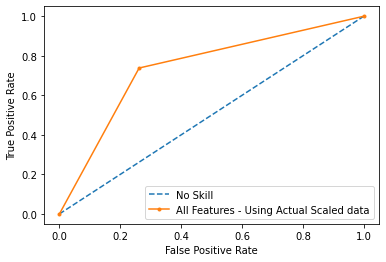

Area under curve: 0.7380952380952381

Logistic Regression
Confusion Matrix:All Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,31,11
Actual 1,5,37


Accuracy Score : 0.8095238095238095
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        42
           1       0.77      0.88      0.82        42

    accuracy                           0.81        84
   macro avg       0.82      0.81      0.81        84
weighted avg       0.82      0.81      0.81        84



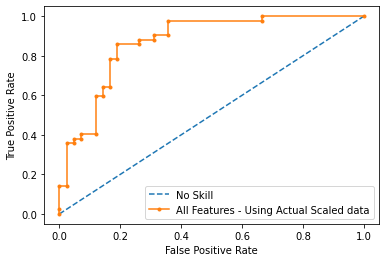

Area under curve: 0.8701814058956917

SVM-Support Vector Machine
Confusion Matrix:All Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,29,13
Actual 1,3,39


Accuracy Score : 0.8095238095238095
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.69      0.78        42
           1       0.75      0.93      0.83        42

    accuracy                           0.81        84
   macro avg       0.83      0.81      0.81        84
weighted avg       0.83      0.81      0.81        84



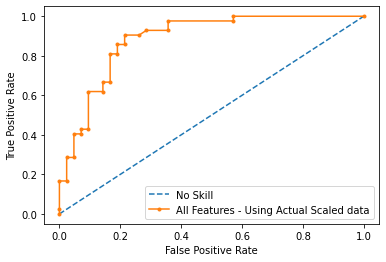

Area under curve: 0.8846371882086168

Bagging - Boostrap Aggregation
Confusion Matrix:All Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,30,12
Actual 1,6,36


Accuracy Score : 0.7857142857142857
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        42
           1       0.75      0.86      0.80        42

    accuracy                           0.79        84
   macro avg       0.79      0.79      0.78        84
weighted avg       0.79      0.79      0.78        84



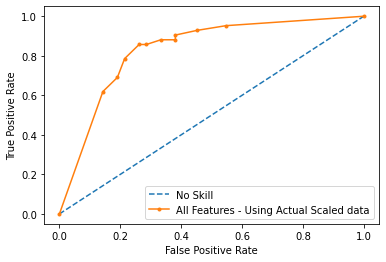

Area under curve: 0.8324829931972789

Adaptative Boosting
Confusion Matrix:All Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,26,16
Actual 1,5,37


Accuracy Score : 0.75
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        42
           1       0.70      0.88      0.78        42

    accuracy                           0.75        84
   macro avg       0.77      0.75      0.75        84
weighted avg       0.77      0.75      0.75        84



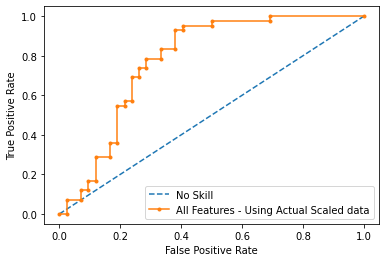

Area under curve: 0.778344671201814

Gradient Boosting - learning: 0.05
Confusion Matrix:All Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,28,14
Actual 1,3,39


Accuracy Score : 0.7976190476190477
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        42
           1       0.74      0.93      0.82        42

    accuracy                           0.80        84
   macro avg       0.82      0.80      0.79        84
weighted avg       0.82      0.80      0.79        84



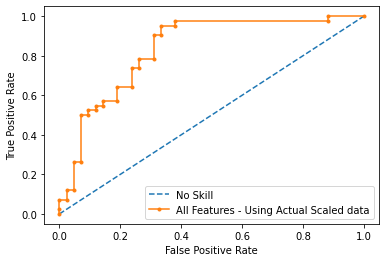

Area under curve: 0.8350340136054422

Random Forest
Confusion Matrix:All Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,27,15
Actual 1,7,35


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        42
           1       0.70      0.83      0.76        42

    accuracy                           0.74        84
   macro avg       0.75      0.74      0.74        84
weighted avg       0.75      0.74      0.74        84



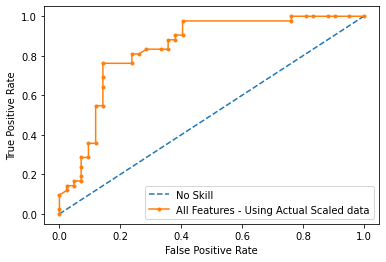

Area under curve: 0.8384353741496599

Decision Tree
Confusion Matrix:Medical Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,28,14
Actual 1,14,28


Accuracy Score : 0.6666666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        42
           1       0.67      0.67      0.67        42

    accuracy                           0.67        84
   macro avg       0.67      0.67      0.67        84
weighted avg       0.67      0.67      0.67        84



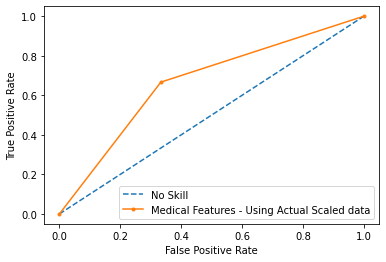

Area under curve: 0.6666666666666667

Logistic Regression
Confusion Matrix:Medical Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,5,37


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        42
           1       0.79      0.88      0.83        42

    accuracy                           0.82        84
   macro avg       0.83      0.82      0.82        84
weighted avg       0.83      0.82      0.82        84



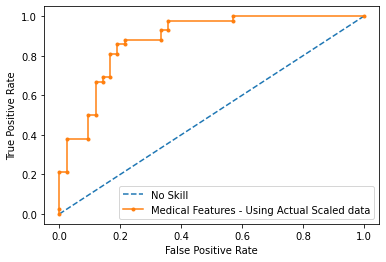

Area under curve: 0.8809523809523809

SVM-Support Vector Machine
Confusion Matrix:Medical Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,30,12
Actual 1,3,39


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        42
           1       0.76      0.93      0.84        42

    accuracy                           0.82        84
   macro avg       0.84      0.82      0.82        84
weighted avg       0.84      0.82      0.82        84



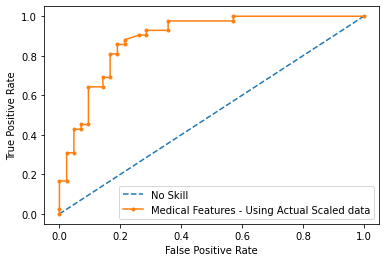

Area under curve: 0.88718820861678

Bagging - Boostrap Aggregation
Confusion Matrix:Medical Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,30,12
Actual 1,6,36


Accuracy Score : 0.7857142857142857
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        42
           1       0.75      0.86      0.80        42

    accuracy                           0.79        84
   macro avg       0.79      0.79      0.78        84
weighted avg       0.79      0.79      0.78        84



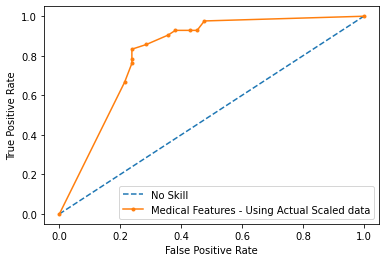

Area under curve: 0.8200113378684807

Adaptative Boosting
Confusion Matrix:Medical Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,28,14
Actual 1,3,39


Accuracy Score : 0.7976190476190477
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        42
           1       0.74      0.93      0.82        42

    accuracy                           0.80        84
   macro avg       0.82      0.80      0.79        84
weighted avg       0.82      0.80      0.79        84



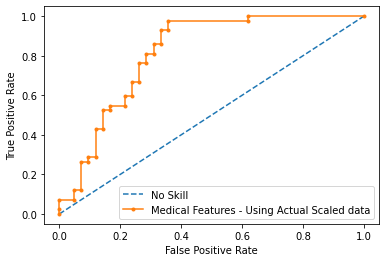

Area under curve: 0.814625850340136

Gradient Boosting - learning: 0.1
Confusion Matrix:Medical Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,28,14
Actual 1,6,36


Accuracy Score : 0.7619047619047619
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        42
           1       0.72      0.86      0.78        42

    accuracy                           0.76        84
   macro avg       0.77      0.76      0.76        84
weighted avg       0.77      0.76      0.76        84



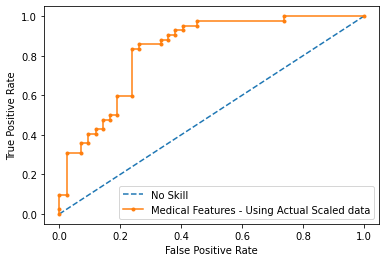

Area under curve: 0.8287981859410432

Random Forest
Confusion Matrix:Medical Features - Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,30,12
Actual 1,7,35


Accuracy Score : 0.7738095238095238
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        42
           1       0.74      0.83      0.79        42

    accuracy                           0.77        84
   macro avg       0.78      0.77      0.77        84
weighted avg       0.78      0.77      0.77        84



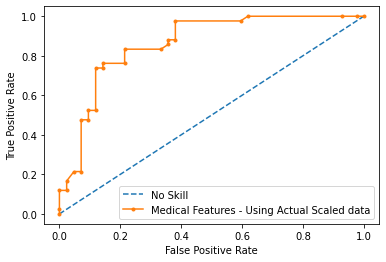

Area under curve: 0.8622448979591838

Decision Tree
Confusion Matrix:All Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,40,10
Actual 1,19,31


Accuracy Score : 0.71
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        50
           1       0.76      0.62      0.68        50

    accuracy                           0.71       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100



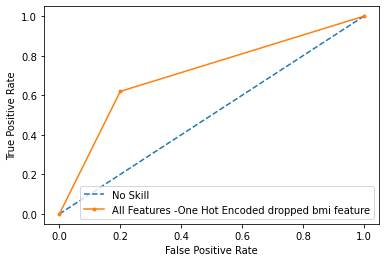

Area under curve: 0.7100000000000002

Logistic Regression
Confusion Matrix:All Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,41,9
Actual 1,5,45


Accuracy Score : 0.86
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.83      0.90      0.87        50

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



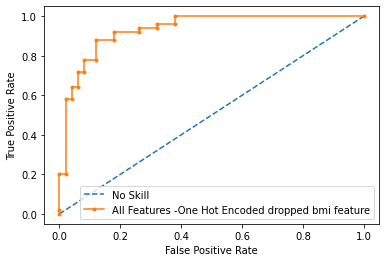

Area under curve: 0.9343999999999999

SVM-Support Vector Machine
Confusion Matrix:All Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,39,11
Actual 1,6,44


Accuracy Score : 0.83
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        50
           1       0.80      0.88      0.84        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



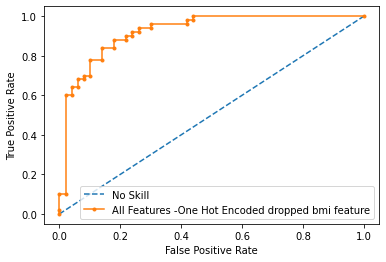

Area under curve: 0.9232

Bagging - Boostrap Aggregation
Confusion Matrix:All Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,40,10
Actual 1,5,45


Accuracy Score : 0.85
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        50
           1       0.82      0.90      0.86        50

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



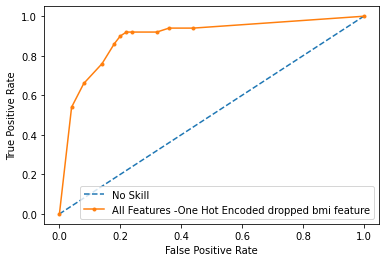

Area under curve: 0.8932

Adaptative Boosting
Confusion Matrix:All Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,38,12
Actual 1,5,45


Accuracy Score : 0.83
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        50
           1       0.79      0.90      0.84        50

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



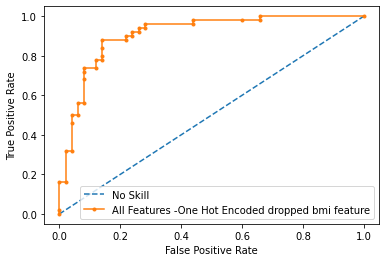

Area under curve: 0.9107999999999999

Gradient Boosting - learning: 0.05
Confusion Matrix:All Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,38,12
Actual 1,5,45


Accuracy Score : 0.83
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        50
           1       0.79      0.90      0.84        50

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



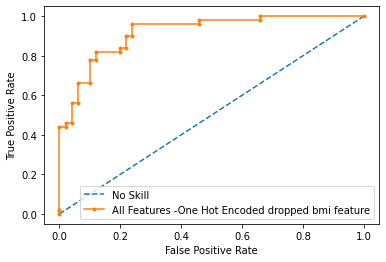

Area under curve: 0.9188

Random Forest
Confusion Matrix:All Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,41,9
Actual 1,8,42


Accuracy Score : 0.83
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.82      0.84      0.83        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



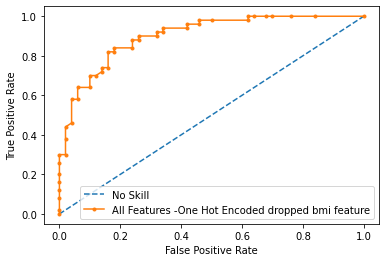

Area under curve: 0.9024

Decision Tree
Confusion Matrix:Medical Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,37,13
Actual 1,12,38


Accuracy Score : 0.75
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        50
           1       0.75      0.76      0.75        50

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



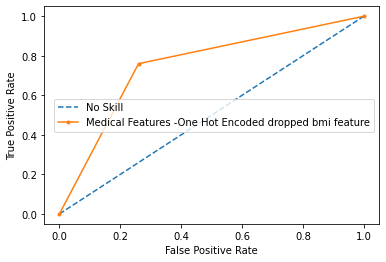

Area under curve: 0.75

Logistic Regression
Confusion Matrix:Medical Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,43,7
Actual 1,6,44


Accuracy Score : 0.87
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.86      0.88      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



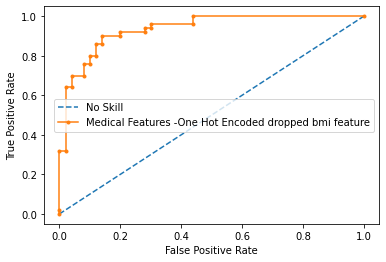

Area under curve: 0.9364

SVM-Support Vector Machine
Confusion Matrix:Medical Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,40,10
Actual 1,5,45


Accuracy Score : 0.85
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        50
           1       0.82      0.90      0.86        50

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



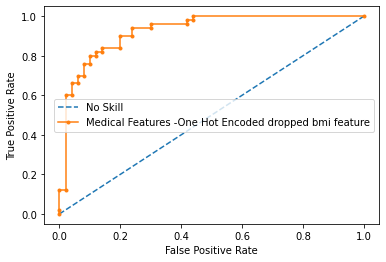

Area under curve: 0.9268000000000001

Bagging - Boostrap Aggregation
Confusion Matrix:Medical Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,40,10
Actual 1,6,44


Accuracy Score : 0.84
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.81      0.88      0.85        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



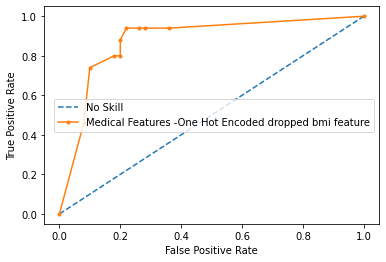

Area under curve: 0.8786

Adaptative Boosting
Confusion Matrix:Medical Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,40,10
Actual 1,3,47


Accuracy Score : 0.87
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.82      0.94      0.88        50

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



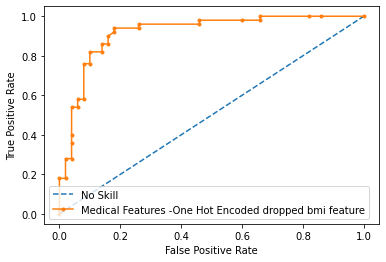

Area under curve: 0.9182

Gradient Boosting - learning: 0.05
Confusion Matrix:Medical Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,41,9
Actual 1,7,43


Accuracy Score : 0.84
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.83      0.86      0.84        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



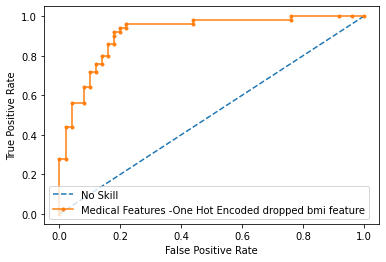

Area under curve: 0.9144

Random Forest
Confusion Matrix:Medical Features -One Hot Encoded dropped bmi feature


,Predicted 0,Predicted 1
Actual 0,41,9
Actual 1,10,40


Accuracy Score : 0.81
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        50
           1       0.82      0.80      0.81        50

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



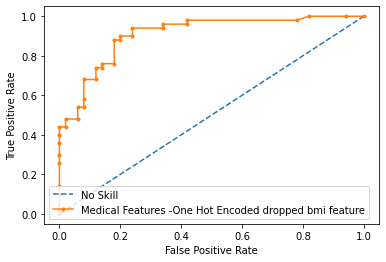

Area under curve: 0.9079999999999999

Decision Tree
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,31,11
Actual 1,16,26


Accuracy Score : 0.6785714285714286
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        42
           1       0.70      0.62      0.66        42

    accuracy                           0.68        84
   macro avg       0.68      0.68      0.68        84
weighted avg       0.68      0.68      0.68        84



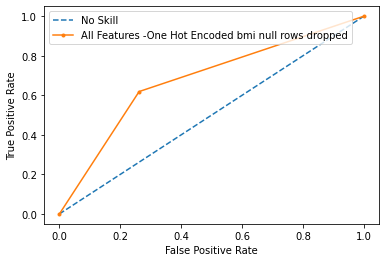

Area under curve: 0.6785714285714286

Logistic Regression
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,31,11
Actual 1,11,31


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.74      0.74      0.74        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



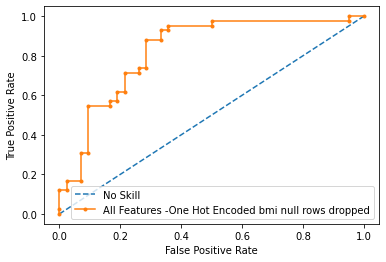

Area under curve: 0.826530612244898

SVM-Support Vector Machine
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,12,30


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.75      0.71      0.73        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



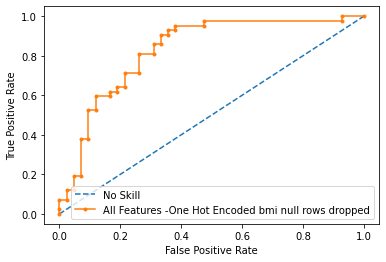

Area under curve: 0.8293650793650793

Bagging - Boostrap Aggregation
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,12,30


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.75      0.71      0.73        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



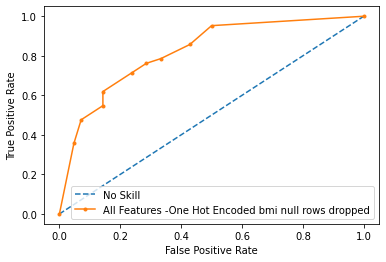

Area under curve: 0.8214285714285714

Adaptative Boosting
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,29,13
Actual 1,15,27


Accuracy Score : 0.6666666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.69      0.67        42
           1       0.68      0.64      0.66        42

    accuracy                           0.67        84
   macro avg       0.67      0.67      0.67        84
weighted avg       0.67      0.67      0.67        84



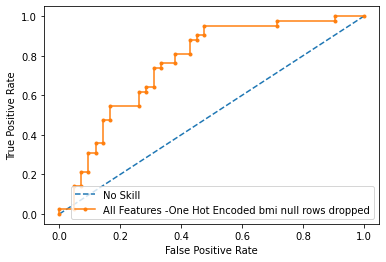

Area under curve: 0.7619047619047619

Gradient Boosting - learning: 0.25
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,13,29


Accuracy Score : 0.7261904761904762
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        42
           1       0.74      0.69      0.72        42

    accuracy                           0.73        84
   macro avg       0.73      0.73      0.73        84
weighted avg       0.73      0.73      0.73        84



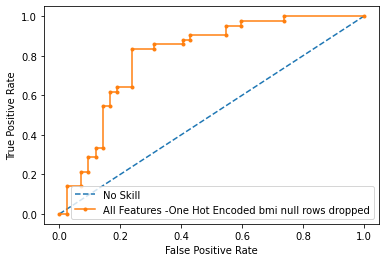

Area under curve: 0.8015873015873016

Random Forest
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,33,9
Actual 1,11,31


Accuracy Score : 0.7619047619047619
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.78      0.74      0.76        42

    accuracy                           0.76        84
   macro avg       0.76      0.76      0.76        84
weighted avg       0.76      0.76      0.76        84



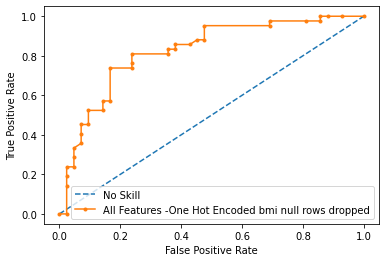

Area under curve: 0.8242630385487528

Decision Tree
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,31,11
Actual 1,20,22


Accuracy Score : 0.6309523809523809
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        42
           1       0.67      0.52      0.59        42

    accuracy                           0.63        84
   macro avg       0.64      0.63      0.63        84
weighted avg       0.64      0.63      0.63        84



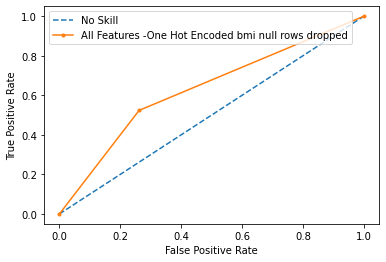

Area under curve: 0.6309523809523809

Logistic Regression
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,12,30


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.75      0.71      0.73        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



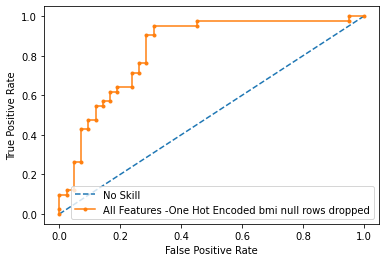

Area under curve: 0.8333333333333333

SVM-Support Vector Machine
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,12,30


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.75      0.71      0.73        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



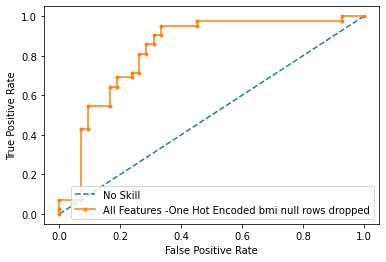

Area under curve: 0.8304988662131518

Bagging - Boostrap Aggregation
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,36,6
Actual 1,11,31


Accuracy Score : 0.7976190476190477
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        42
           1       0.84      0.74      0.78        42

    accuracy                           0.80        84
   macro avg       0.80      0.80      0.80        84
weighted avg       0.80      0.80      0.80        84



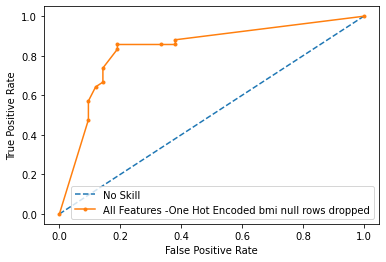

Area under curve: 0.8356009070294784

Adaptative Boosting
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,29,13
Actual 1,15,27


Accuracy Score : 0.6666666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.69      0.67        42
           1       0.68      0.64      0.66        42

    accuracy                           0.67        84
   macro avg       0.67      0.67      0.67        84
weighted avg       0.67      0.67      0.67        84



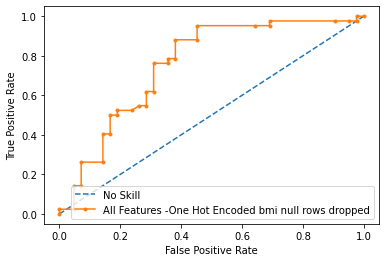

Area under curve: 0.7576530612244898

Gradient Boosting - learning: 0.05
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,13,29


Accuracy Score : 0.7261904761904762
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        42
           1       0.74      0.69      0.72        42

    accuracy                           0.73        84
   macro avg       0.73      0.73      0.73        84
weighted avg       0.73      0.73      0.73        84



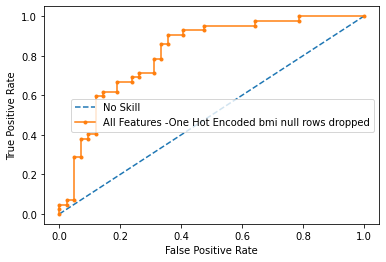

Area under curve: 0.8151927437641724

Random Forest
Confusion Matrix:All Features -One Hot Encoded bmi null rows dropped


,Predicted 0,Predicted 1
Actual 0,34,8
Actual 1,11,31


Accuracy Score : 0.7738095238095238
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.79      0.74      0.77        42

    accuracy                           0.77        84
   macro avg       0.78      0.77      0.77        84
weighted avg       0.78      0.77      0.77        84



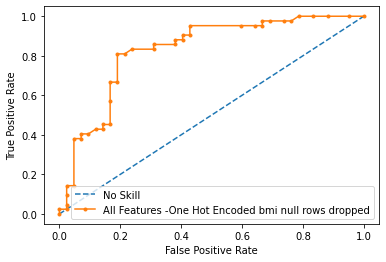

Area under curve: 0.8290816326530612



In [15]:
#All Models training and testing

models = []

for i, _ in enumerate(ys):
    X_train = Xs[i]
    y_train= ys[i]
    X_test = Xs_test[i]
    y_test= ys_test[i]
    label= cmlabel[i]
    boost_learn=train_test_assess_boosting_learning(X_train, y_train, X_test, y_test)
    
    model = {
        "Tree":train_test_trees(X_train, y_train, X_test, y_test, label),
        "Logit":train_test_logit(X_train, y_train, X_test, y_test, label),
        "SVM":train_test_svm(X_train, y_train, X_test, y_test, label),
        "Bagging":train_test_bagging(X_train, y_train, X_test, y_test, label),
        "AdaBoost":train_test_adaboosting(X_train, y_train, X_test, y_test, label),
        "GradBoost":train_test_boosting(X_train, y_train, X_test, y_test, label, boost_learn),
        "RandomForest":train_test_randomforest(X_train, y_train, X_test, y_test, label)
    }


    models.append(model)

In [16]:
#Best model based on F1 Score and AUC
best="Medical Features -One Hot Encoded dropped bmi feature"
index=cmlabel.index(best)
print(models[index])

{'Tree': DecisionTreeClassifier(), 'Logit': LogisticRegression(max_iter=400), 'SVM': SVC(kernel='linear', probability=True), 'Bagging': BaggingClassifier(base_estimator=SVC()), 'AdaBoost': AdaBoostClassifier(n_estimators=100), 'GradBoost': GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=200), 'RandomForest': RandomForestClassifier(n_estimators=512)}


In [17]:
winning_model = models[index]["Logit"]

In [18]:
type(winning_model)

sklearn.linear_model._logistic.LogisticRegression

In [19]:
#Model features
Xs[index].columns.values

array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype=object)

In [20]:
#Model coefficients
winning_model.coef_

array([[ 1.41368942,  0.29011716,  0.05257806,  0.33856801,  0.08185906,
        -0.08185906,  0.        ,  0.04465883,  0.08659867, -0.23102194,
         0.15969536]])